/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/2179455419.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)  # Sum of remaining species below threshold
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/2179455419.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)  # Ensure no negative values
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_1

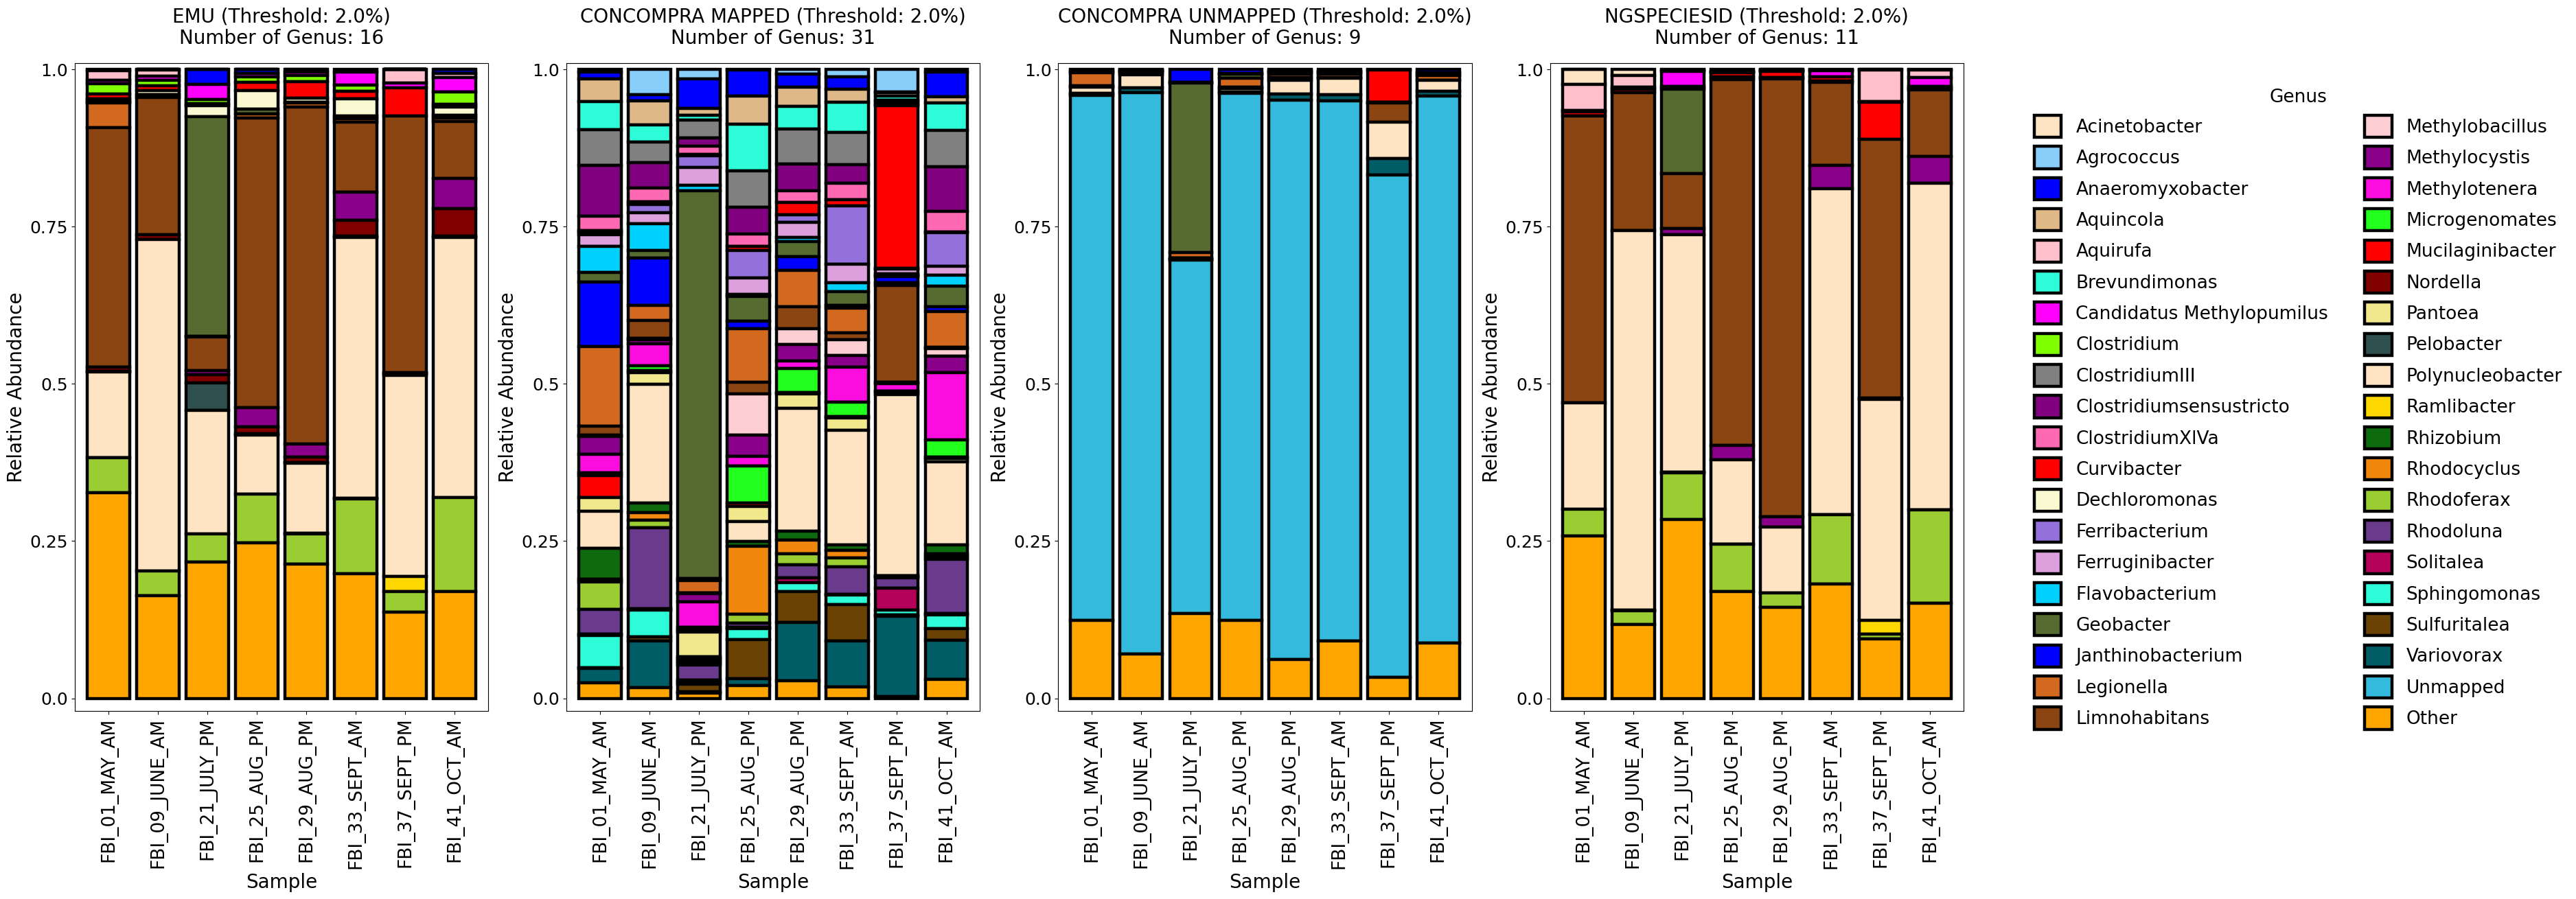

Species-Color Mapping: {'Unmapped': '#33BADC', 'Anaeromyxobacter': '#0000FF', 'Aquirufa': '#FFC0CB', 'Candidatus Methylopumilus': '#FF00FF', 'Clostridium': '#7FFF00', 'Curvibacter': '#FF0000', 'Dechloromonas': '#FAFAD2', 'Geobacter': '#556B2F', 'Legionella': '#D2691E', 'Limnohabitans': '#8B4513', 'Methylocystis': '#8B008B', 'Nordella': '#800000', 'Pelobacter': '#2F4F4F', 'Polynucleobacter': '#FFE4C4', 'Ramlibacter': '#FFD700', 'Rhodoferax': '#9ACD32', 'Other': '#FFA500', 'Agrococcus': '#87CEFA', 'Aquincola': '#DEB887', 'Brevundimonas': '#2EFCD8', 'ClostridiumIII': '#808080', 'Clostridiumsensustricto': '#800080', 'ClostridiumXlVa': '#FF69B4', 'Ferribacterium': '#9370DB', 'Ferruginibacter': '#DDA0DD', 'Flavobacterium': '#00D0FE', 'Janthinobacterium': '#0000FF', 'Methylobacillus': '#FDCED2', 'Methylotenera': '#FA0DDE', 'Microgenomates': '#22FF1C', 'Mucilaginibacter': '#FF0000', 'Pantoea': '#F1E78C', 'Rhizobium': '#0D6A0D', 'Rhodocyclus': '#F2870D', 'Rhodoluna': '#6A3B8D', 'Solitalea': '#B

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import OrderedDict

# Directories containing the TSV files
directories = {
    'EMU': './FBI/emu',
    'CONCOMPRA MAPPED': './FBI/concompra',
    'CONCOMPRA UNMAPPED': './FBI/concompra_unmapped',
    'NGSPECIESID': './FBI/ngspeciesid'
    '',
 
}

# Prepare the figure and axes
num_datasets = len(directories)
fig, axes = plt.subplots(1, num_datasets, figsize=(8 * num_datasets, 22))
axes = axes.flatten()


# Global species_color_map to ensure consistent colors
species_color_map = {}

# Define the custom color palette
colors_list = [
    "#ADD8E6", "#0000FF", "#FFC0CB", "#FF00FF", "#7FFF00", "#FF0000", "#FAFAD2", "#556B2F", "#D2691E",
    "#8B4513", "#8B008B", "#800000", "#2F4F4F", "#FFE4C4", "#FFD700", "#9ACD32", "#6495ED",
    "#87CEFA", "#DEB887", "#2EFCD8", "#808080", "#800080", "#FF69B4", "#9370DB", "#DDA0DD",
    "#00D0FE", "#0000FF", "#FDCED2", "#FA0DDE", "#22FF1C", "#FF0000", "#F1E78C", "#0D6A0D", "#F2870D",
    "#6A3B8D", "#B40058", "#2EFCD8", "#6A4204", "#005D66", "#FFE4C4", "#D3EAA7", "#7E99FD",
    "#BFE9F3", "#F1BC76", "#FFFFFF", "#8B008B", "#FF9495", "#85CB0D", "#D3BBFD", "#B9792D",
    "#FE0083", "#B02ABB", "#868A71", "#FFFF00", "#808080", "#B90032", "#B90295", "#00008B", "#FE97E9",
    "#B9798D", "#8B7D6B", "#F1BC87", "#7E99FA", "#B40051", "#ADD8E6", "#FA0DDA", "#FFFFE0",
    "#A9A9A9", "#FF00FF", "#A52A2A", "#90EE90", "#FFB6C1", "#FFB6C1", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", 
    "#FF8C00", "#BDB76B", "#2E8B57", "#FF4500", "#CD5C5C",
    "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23", "#FF1493",
    "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A",
    "#4682B4", "#9ACD32", "#E9967A", "#483D8B", "#20B2AA", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", "#FF8C00", "#BDB76B",
    "#2E8B57", "#FF4500", "#CD5C5C", "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23",
    "#FF1493", "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A", "#4682B4",
    "#E9967A", "#20B2AA", "#B22222", "#48D1CC", "#F08080", "#FF7F50", "#E0FFFF",
    "#B0C4DE", "#BC8F8F", "#DAA520", "#98FB98", "#ADFF2F", "#556B2F", "#8B0000",
    "#708090", "#D2B48C", "#CD853F", "#FFDEAD", "#A0522D", "#FF69B4", "#FFEFD5",
    "#DB7093", "#AFEEEE", "#FFFAF0", "#FFEB3B", "#C71585", "#9ACD32", "#F5DEB3"
]

# Threshold for significant species
threshold = 0.02

# For collecting legend entries
handles_list = []
labels_list = []

# Process each dataset
for idx, (key, directory) in enumerate(directories.items()):
    # Prepare an empty DataFrame for combining data
    combined_df = pd.DataFrame()

    # Process each file in the directory
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.tsv'):
            filepath = os.path.join(directory, filename)
            # Load the data from TSV file
            df = pd.read_csv(filepath, sep='\t', usecols=['genus', 'abundance'])
            # Aggregate the abundances by species
            df_aggregated = df.groupby('genus').abundance.sum().reset_index()
            # Transpose and set species as columns, total abundances as the only row
            df_aggregated = df_aggregated.set_index('genus').T
            # Rename the index to use the filename as the sample identifier
            df_aggregated.index = [filename.replace('.tsv', '')]
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df_aggregated], axis=0)

    # Fill NaN with zeros if any species does not appear in some files
    combined_df.fillna(0, inplace=True)

    # Normalize the data to sum to 1 for each sample
    combined_df = combined_df.div(combined_df.sum(axis=1), axis=0)

    # Apply threshold and calculate "Other" category
    significant_species = combined_df.columns[combined_df.max(axis=0) > threshold]
    df_thresholded = combined_df[significant_species]
    df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)  # Sum of remaining species below threshold
    df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)  # Ensure no negative values

    # Sort the species columns alphabetically, with "Other" at the end
    # Initialize sorting
    base_species = [col for col in df_thresholded.columns if col not in ['Other', 'Unmapped']]
    sorted_species = sorted(base_species, key=str.lower)

    # Conditionally add 'Unmapped' and 'Other' at the end
    sorted_columns = sorted_species.copy()
    if 'Unmapped' in df_thresholded.columns:
        sorted_columns.append('Unmapped')
    if 'Other' in df_thresholded.columns:
        sorted_columns.append('Other')

    df_thresholded = df_thresholded[sorted_columns]


    # Assign colors to each species, saving the mapping to the species_color_map dictionary
    plot_colors = []
    # Force "Unmapped" to have a consistent color
    species_color_map['Unmapped'] = "#33BADC"  # dark red or any other color you prefer

    for species in df_thresholded.columns:
        if species in species_color_map:
            # Use the existing color if it has already been assigned
            plot_colors.append(species_color_map[species])
        else:
            # Assign a new color from the list
            if len(species_color_map) < len(colors_list):
                color = colors_list[len(species_color_map) % len(colors_list)]
            else:
                color = "#000000"  # Default to black if out of colors
            species_color_map[species] = color  # Save the color to the map
            plot_colors.append(color)

    # Ensure "Other" is always orange
    species_color_map['Other'] = '#FFA500'
    # Update the color in plot_colors
    other_index = df_thresholded.columns.get_loc('Other')
    plot_colors[other_index] = '#FFA500'

    # Plot stacked bar chart with normalized data
    ax = df_thresholded.plot(
        kind='bar',
        stacked=True,
        width=0.86,
        ax=axes[idx],
        color=plot_colors,
        edgecolor='black',
        linewidth=3.2,
        legend=False  # Disable individual legends
    )
    axes[idx].set_xlabel('Sample', fontsize=20)
    axes[idx].set_ylabel('Relative Abundance', fontsize=20)
    axes[idx].set_title(f'{key} (Threshold: {threshold*100}%)\nNumber of Genus: {len(df_thresholded.columns)}', fontsize=20, pad=20)
    axes[idx].tick_params(axis='x', labelsize=19)
    axes[idx].tick_params(axis='y', labelsize=18)


    # Customize y-axis ticks to be inverted but keep the scale intact
    axes[idx].set_ylim(-0.01, 1.02)
    axes[idx].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axes[idx].set_yticklabels(['1.0', '0.75', '0.5', '0.25', '0.0'])
    axes[idx].invert_yaxis()

    # Collect legend handles and labels
    handles, labels = axes[idx].get_legend_handles_labels()
    handles_list.extend(handles)
    labels_list.extend(labels)

# Remove duplicate legend entries
by_label = OrderedDict(zip(labels_list, handles_list))

# Separate "Other" from the labels for special handling

unmapped_label = 'Unmapped'
unmapped_handle = by_label.pop(unmapped_label, None)

other_label = 'Other'
other_handle = by_label.pop(other_label, None)



# Sort the remaining labels alphabetically
sorted_labels = sorted(by_label.keys(), key=str.lower)

# Add "Other" back at the end if it was in the labels
if unmapped_handle:
    sorted_labels.append(unmapped_label)
    by_label[unmapped_label] = unmapped_handle

if other_handle:
    sorted_labels.append(other_label)
    by_label[other_label] = other_handle

# Get the corresponding handles in order
sorted_handles = [by_label[label] for label in sorted_labels]

# Create a single legend at the bottom of the figure
fig.legend(
    sorted_handles,
    sorted_labels,
    title='Genus',
    loc='upper left',
    bbox_to_anchor=(1.02, 0.95), 
    ncol=2,
    fontsize='19',
    title_fontsize='19',
    edgecolor='black',
    fancybox=True,
    handleheight=1.5,   # Adjust this value to make the handles square
    handlelength=1.5,    # Adjust this value to match handleheight
    frameon=False  # This removes the legend border

)

# Adjust layout to make room for the legend
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0.1, 0.4, 1, 1])
plt.savefig("FBI-GENUS.svg", format='svg', bbox_inches='tight')


plt.show()

# Print the species-color mapping for verification
print("Species-Color Mapping:", species_color_map)


/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/4292663079.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/4292663079.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/4292663079.py:81: SettingWithCopyWarning: 
A value is trying to be s

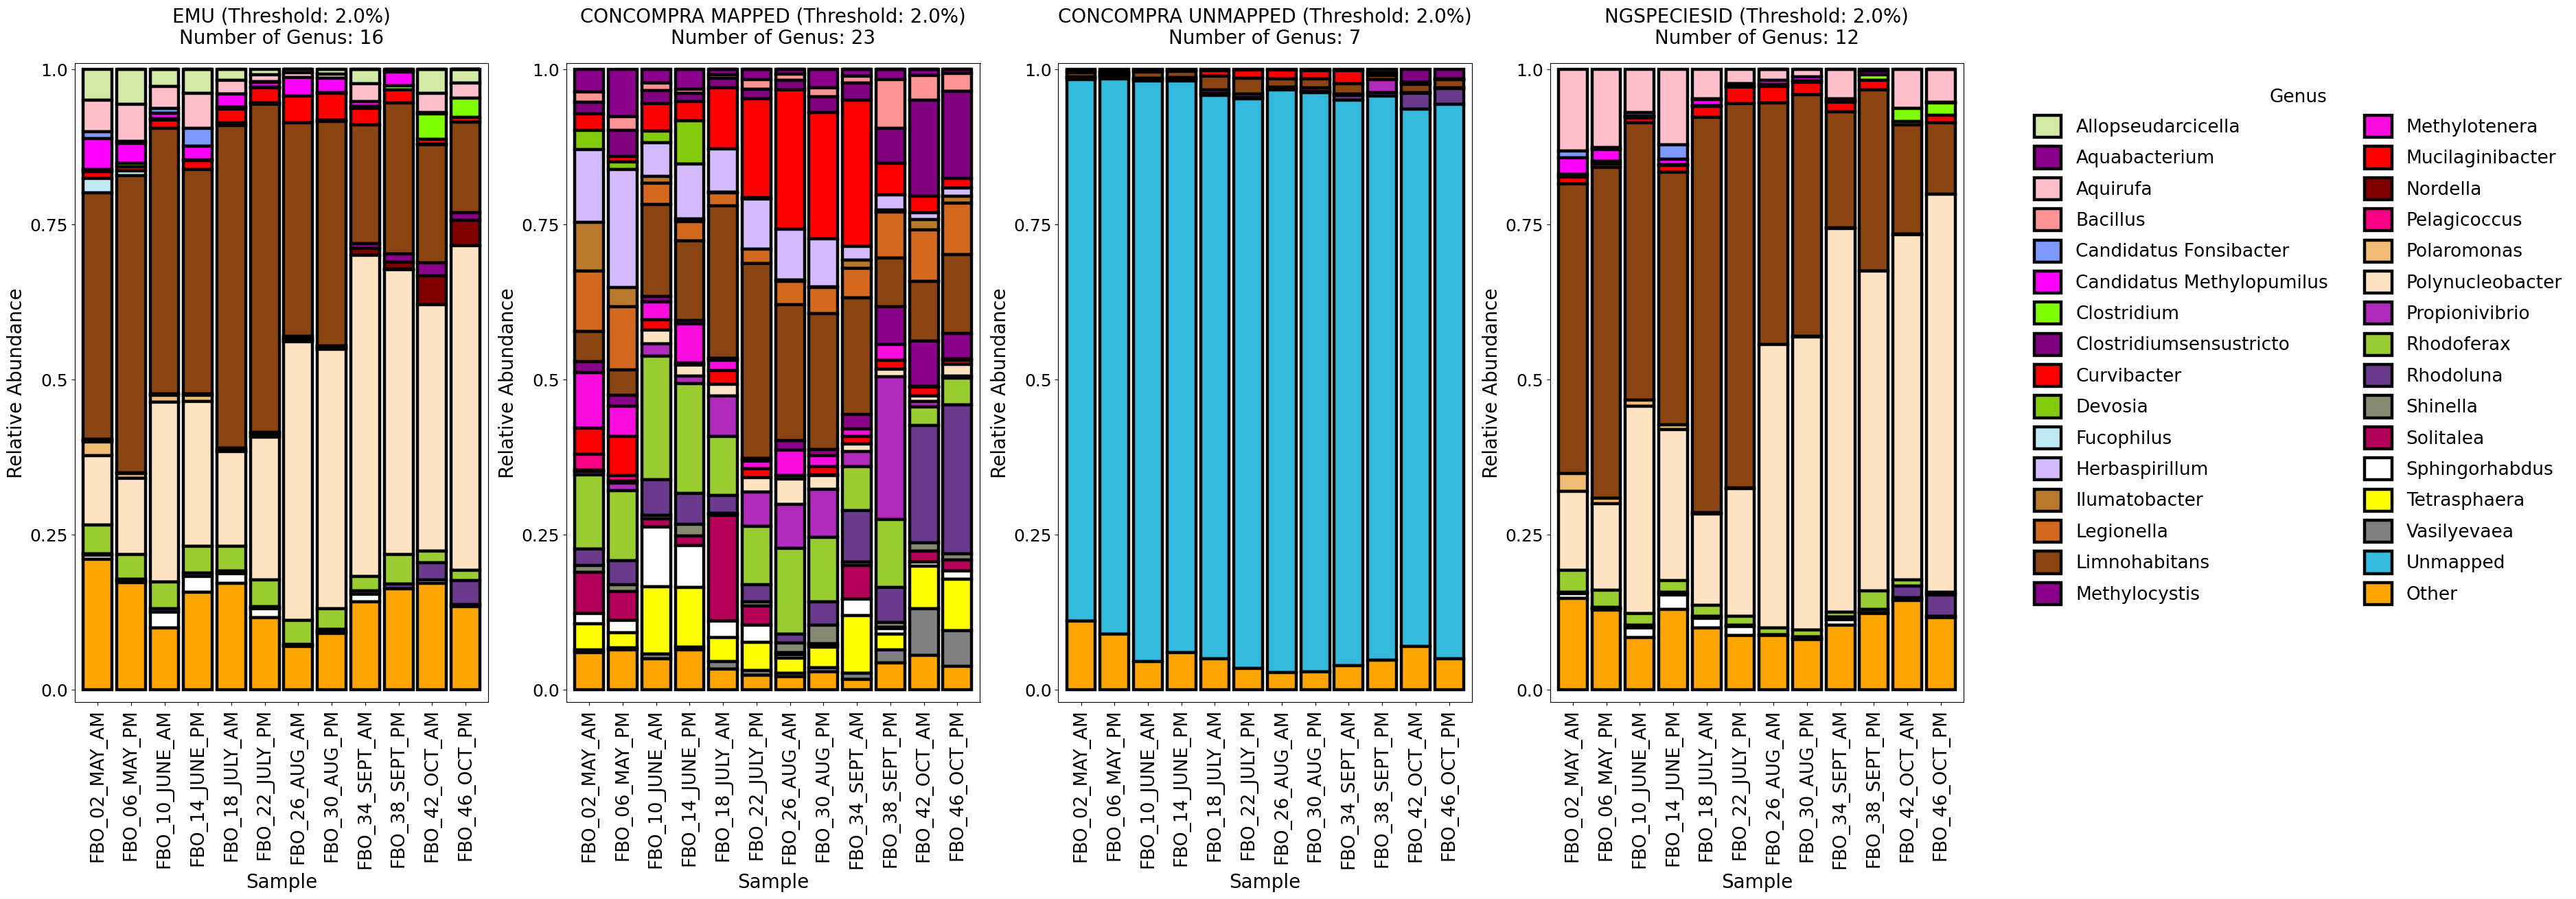

Species-Color Mapping: {'Unmapped': '#33BADC', 'Anaeromyxobacter': '#0000FF', 'Aquirufa': '#FFC0CB', 'Candidatus Methylopumilus': '#FF00FF', 'Clostridium': '#7FFF00', 'Curvibacter': '#FF0000', 'Dechloromonas': '#FAFAD2', 'Geobacter': '#556B2F', 'Legionella': '#D2691E', 'Limnohabitans': '#8B4513', 'Methylocystis': '#8B008B', 'Nordella': '#800000', 'Pelobacter': '#2F4F4F', 'Polynucleobacter': '#FFE4C4', 'Ramlibacter': '#FFD700', 'Rhodoferax': '#9ACD32', 'Other': '#FFA500', 'Agrococcus': '#87CEFA', 'Aquincola': '#DEB887', 'Brevundimonas': '#2EFCD8', 'ClostridiumIII': '#808080', 'Clostridiumsensustricto': '#800080', 'ClostridiumXlVa': '#FF69B4', 'Ferribacterium': '#9370DB', 'Ferruginibacter': '#DDA0DD', 'Flavobacterium': '#00D0FE', 'Janthinobacterium': '#0000FF', 'Methylobacillus': '#FDCED2', 'Methylotenera': '#FA0DDE', 'Microgenomates': '#22FF1C', 'Mucilaginibacter': '#FF0000', 'Pantoea': '#F1E78C', 'Rhizobium': '#0D6A0D', 'Rhodocyclus': '#F2870D', 'Rhodoluna': '#6A3B8D', 'Solitalea': '#B

In [6]:
# ONLY RUN IT IF FIRST ITERATION IS RAN, THE CODE IS DIFFERENT

import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import OrderedDict

# Directories containing the TSV files
directories = {
    'EMU': './FBO/emu',
    'CONCOMPRA MAPPED': './FBO/concompra',
    'CONCOMPRA UNMAPPED': './FBO/concompra_unmapped',
    'NGSPECIESID': './FBO/ngspeciesid'
}

# Prepare the figure and axes
num_datasets = len(directories)
fig, axes = plt.subplots(1, num_datasets, figsize=(8 * num_datasets, 22))
axes = axes.flatten()

# Define the custom color palette
colors_list = [
    "#ADD8E6", "#0000FF", "#FFC0CB", "#FF00FF", "#7FFF00", "#FF0000", "#FAFAD2", "#556B2F", "#D2691E",
    "#8B4513", "#8B008B", "#800000", "#2F4F4F", "#FFE4C4", "#FFD700", "#9ACD32", "#6495ED",
    "#87CEFA", "#DEB887", "#2EFCD8", "#808080", "#800080", "#FF69B4", "#9370DB", "#DDA0DD",
    "#00D0FE", "#0000FF", "#FDCED2", "#FA0DDE", "#22FF1C", "#FF0000", "#F1E78C", "#0D6A0D", "#F2870D",
    "#6A3B8D", "#B40058", "#2EFCD8", "#6A4204", "#005D66", "#FFE4C4", "#D3EAA7", "#7E99FD",
    "#BFE9F3", "#F1BC76", "#FFFFFF", "#8B008B", "#FF9495", "#85CB0D", "#D3BBFD", "#B9792D",
    "#FE0083", "#B02ABB", "#868A71", "#FFFF00", "#808080", "#B90032", "#B90295", "#00008B", "#FE97E9",
    "#B9798D", "#8B7D6B", "#F1BC87", "#7E99FA", "#B40051", "#ADD8E6", "#FA0DDA", "#FFFFE0",
    "#A9A9A9", "#FF00FF", "#A52A2A", "#90EE90", "#FFB6C1", "#FFB6C1", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", 
    "#FF8C00", "#BDB76B", "#2E8B57", "#FF4500", "#CD5C5C",
    "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23", "#FF1493",
    "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A",
    "#4682B4", "#9ACD32", "#E9967A", "#483D8B", "#20B2AA", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", "#FF8C00", "#BDB76B",
    "#2E8B57", "#FF4500", "#CD5C5C", "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23",
    "#FF1493", "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A", "#4682B4",
    "#E9967A", "#20B2AA", "#B22222", "#48D1CC", "#F08080", "#FF7F50", "#E0FFFF",
    "#B0C4DE", "#BC8F8F", "#DAA520", "#98FB98", "#ADFF2F", "#556B2F", "#8B0000",
    "#708090", "#D2B48C", "#CD853F", "#FFDEAD", "#A0522D", "#FF69B4", "#FFEFD5",
    "#DB7093", "#AFEEEE", "#FFFAF0", "#FFEB3B", "#C71585", "#9ACD32", "#F5DEB3"
]


# Threshold for significant species
threshold = 0.02

# For collecting legend entries
handles_list = []
labels_list = []

# Process each dataset
for idx, (key, directory) in enumerate(directories.items()):
    # Prepare an empty DataFrame for combining data
    combined_df = pd.DataFrame()

    # Process each file in the directory
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.tsv'):
            filepath = os.path.join(directory, filename)
            # Load the data from TSV file
            df = pd.read_csv(filepath, sep='\t', usecols=['genus', 'abundance'])
            # Aggregate the abundances by genus
            df_aggregated = df.groupby('genus').abundance.sum().reset_index()
            # Transpose and set genus as columns, total abundances as the only row
            df_aggregated = df_aggregated.set_index('genus').T
            # Rename the index to use the filename as the sample identifier
            df_aggregated.index = [filename.replace('.tsv', '')]
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df_aggregated], axis=0)

    # Fill NaN with zeros if any genus does not appear in some files
    combined_df.fillna(0, inplace=True)

    # Normalize the data to sum to 1 for each sample
    combined_df = combined_df.div(combined_df.sum(axis=1), axis=0)

    # Apply threshold and calculate "Other" category
    significant_species = combined_df.columns[combined_df.max(axis=0) > threshold]
    df_thresholded = combined_df[significant_species]
    df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
    df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)

    # Sort the species columns alphabetically, with "Other" at the end
    base_species = [col for col in df_thresholded.columns if col not in ['Other', 'Unmapped']]
    sorted_species = sorted(base_species, key=str.lower)
    sorted_columns = sorted_species.copy()

    if 'Unmapped' in df_thresholded.columns:
        sorted_columns.append('Unmapped')
    if 'Other' in df_thresholded.columns:
        sorted_columns.append('Other')

    df_thresholded = df_thresholded[sorted_columns]

    # Assign colors to each species, saving the mapping to the species_color_map dictionary
    plot_colors = []

    # Ensure special colors always exist
    if 'Unmapped' in df_thresholded.columns:
        species_color_map.setdefault('Unmapped', "#33BADC")
    if 'Other' in df_thresholded.columns:
        species_color_map.setdefault('Other', "#FFA500")

    for species in df_thresholded.columns:
        if species in species_color_map:
            plot_colors.append(species_color_map[species])
        else:
            if len(species_color_map) < len(colors_list):
                color = colors_list[len(species_color_map) % len(colors_list)]
            else:
                color = "#000000"
            species_color_map[species] = color
            plot_colors.append(color)

    # Plot stacked bar chart with normalized data
    ax = df_thresholded.plot(
        kind='bar',
        stacked=True,
        width=0.86,
        ax=axes[idx],
        color=plot_colors,
        edgecolor='black',
        linewidth=3.2,
        legend=False
    )
    axes[idx].set_xlabel('Sample', fontsize=20)
    axes[idx].set_ylabel('Relative Abundance', fontsize=20)
    axes[idx].set_title(f'{key} (Threshold: {threshold*100}%)\nNumber of Genus: {len(df_thresholded.columns)}', fontsize=20, pad=20)
    axes[idx].tick_params(axis='x', labelsize=19)
    axes[idx].tick_params(axis='y', labelsize=18)

    axes[idx].set_ylim(-0.01, 1.02)
    axes[idx].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axes[idx].set_yticklabels(['1.0', '0.75', '0.5', '0.25', '0.0'])
    axes[idx].invert_yaxis()

    handles, labels = axes[idx].get_legend_handles_labels()
    handles_list.extend(handles)
    labels_list.extend(labels)

# Remove duplicate legend entries
by_label = OrderedDict(zip(labels_list, handles_list))

unmapped_label = 'Unmapped'
unmapped_handle = by_label.pop(unmapped_label, None)

other_label = 'Other'
other_handle = by_label.pop(other_label, None)

sorted_labels = sorted(by_label.keys(), key=str.lower)

if unmapped_handle:
    sorted_labels.append(unmapped_label)
    by_label[unmapped_label] = unmapped_handle

if other_handle:
    sorted_labels.append(other_label)
    by_label[other_label] = other_handle

sorted_handles = [by_label[label] for label in sorted_labels]

fig.legend(
    sorted_handles,
    sorted_labels,
    title='Genus',
    loc='upper left',
    bbox_to_anchor=(1.02, 0.95),
    ncol=2,
    fontsize='19',
    title_fontsize='19',
    edgecolor='black',
    fancybox=True,
    handleheight=1.5,
    handlelength=1.5,
    frameon=False
)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0.1, 0.4, 1, 1])
plt.savefig("FBO-GENUS.svg", format='svg', bbox_inches='tight')

plt.show()

print("Species-Color Mapping:", species_color_map)


/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1554134022.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1554134022.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1554134022.py:81: SettingWithCopyWarning: 
A value is trying to be s

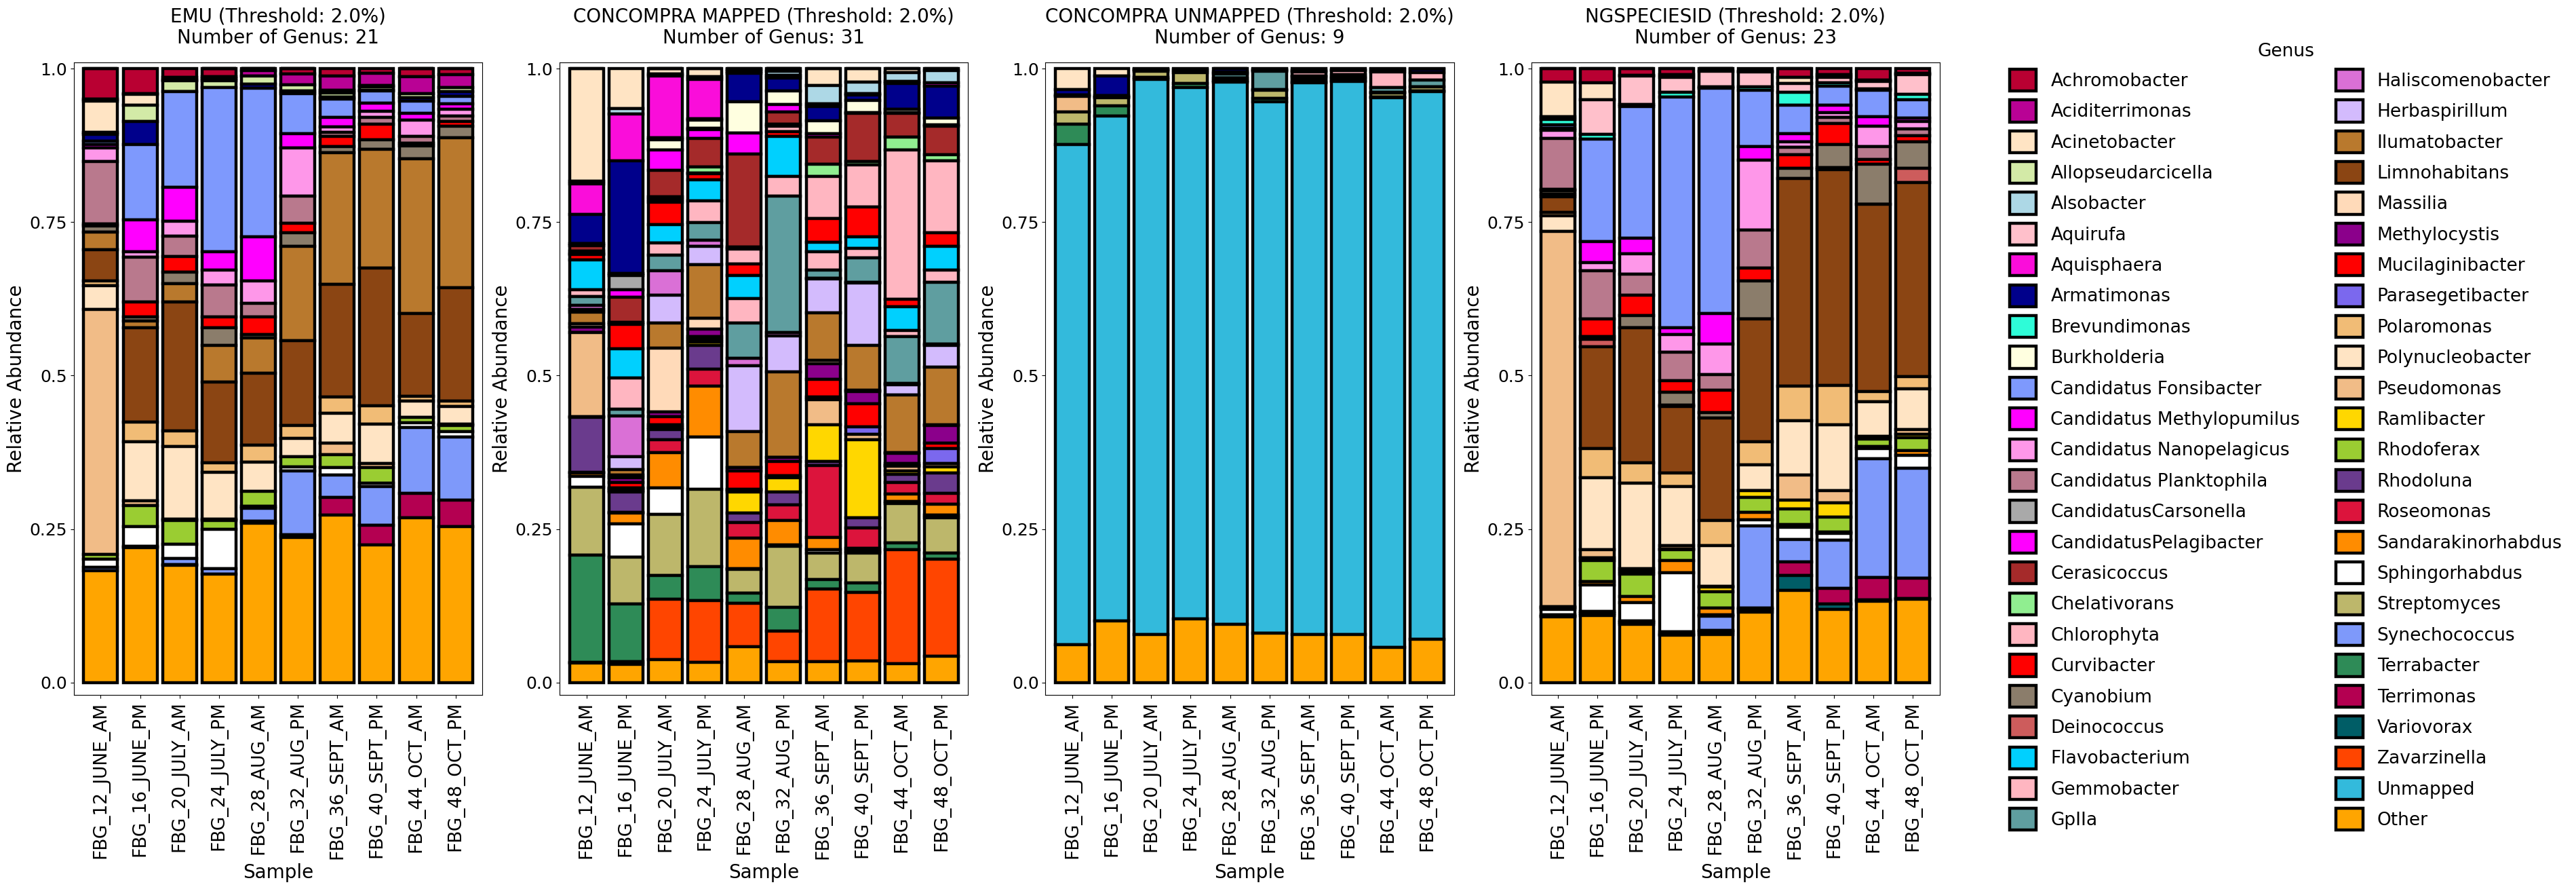

Species-Color Mapping: {'Unmapped': '#33BADC', 'Anaeromyxobacter': '#0000FF', 'Aquirufa': '#FFC0CB', 'Candidatus Methylopumilus': '#FF00FF', 'Clostridium': '#7FFF00', 'Curvibacter': '#FF0000', 'Dechloromonas': '#FAFAD2', 'Geobacter': '#556B2F', 'Legionella': '#D2691E', 'Limnohabitans': '#8B4513', 'Methylocystis': '#8B008B', 'Nordella': '#800000', 'Pelobacter': '#2F4F4F', 'Polynucleobacter': '#FFE4C4', 'Ramlibacter': '#FFD700', 'Rhodoferax': '#9ACD32', 'Other': '#FFA500', 'Agrococcus': '#87CEFA', 'Aquincola': '#DEB887', 'Brevundimonas': '#2EFCD8', 'ClostridiumIII': '#808080', 'Clostridiumsensustricto': '#800080', 'ClostridiumXlVa': '#FF69B4', 'Ferribacterium': '#9370DB', 'Ferruginibacter': '#DDA0DD', 'Flavobacterium': '#00D0FE', 'Janthinobacterium': '#0000FF', 'Methylobacillus': '#FDCED2', 'Methylotenera': '#FA0DDE', 'Microgenomates': '#22FF1C', 'Mucilaginibacter': '#FF0000', 'Pantoea': '#F1E78C', 'Rhizobium': '#0D6A0D', 'Rhodocyclus': '#F2870D', 'Rhodoluna': '#6A3B8D', 'Solitalea': '#B

In [7]:
# ONLY RUN IT IF FIRST ITERATION IS RAN, THE CODE IS DIFFERENT

import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import OrderedDict

# Directories containing the TSV files
directories = {
    'EMU': './FBG/emu',
    'CONCOMPRA MAPPED': './FBG/concompra',
    'CONCOMPRA UNMAPPED': './FBG/concompra_unmapped',
    'NGSPECIESID': './FBG/ngspeciesid'
}

# Prepare the figure and axes
num_datasets = len(directories)
fig, axes = plt.subplots(1, num_datasets, figsize=(8 * num_datasets, 22))
axes = axes.flatten()

# Define the custom color palette
colors_list = [
    "#ADD8E6", "#0000FF", "#FFC0CB", "#FF00FF", "#7FFF00", "#FF0000", "#FAFAD2", "#556B2F", "#D2691E",
    "#8B4513", "#8B008B", "#800000", "#2F4F4F", "#FFE4C4", "#FFD700", "#9ACD32", "#6495ED",
    "#87CEFA", "#DEB887", "#2EFCD8", "#808080", "#800080", "#FF69B4", "#9370DB", "#DDA0DD",
    "#00D0FE", "#0000FF", "#FDCED2", "#FA0DDE", "#22FF1C", "#FF0000", "#F1E78C", "#0D6A0D", "#F2870D",
    "#6A3B8D", "#B40058", "#2EFCD8", "#6A4204", "#005D66", "#FFE4C4", "#D3EAA7", "#7E99FD",
    "#BFE9F3", "#F1BC76", "#FFFFFF", "#8B008B", "#FF9495", "#85CB0D", "#D3BBFD", "#B9792D",
    "#FE0083", "#B02ABB", "#868A71", "#FFFF00", "#808080", "#B90032", "#B90295", "#00008B", "#FE97E9",
    "#B9798D", "#8B7D6B", "#F1BC87", "#7E99FA", "#B40051", "#ADD8E6", "#FA0DDA", "#FFFFE0",
    "#A9A9A9", "#FF00FF", "#A52A2A", "#90EE90", "#FFB6C1", "#FFB6C1", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", 
    "#FF8C00", "#BDB76B", "#2E8B57", "#FF4500", "#CD5C5C",
    "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23", "#FF1493",
    "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A",
    "#4682B4", "#9ACD32", "#E9967A", "#483D8B", "#20B2AA", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", "#FF8C00", "#BDB76B",
    "#2E8B57", "#FF4500", "#CD5C5C", "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23",
    "#FF1493", "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A", "#4682B4",
    "#E9967A", "#20B2AA", "#B22222", "#48D1CC", "#F08080", "#FF7F50", "#E0FFFF",
    "#B0C4DE", "#BC8F8F", "#DAA520", "#98FB98", "#ADFF2F", "#556B2F", "#8B0000",
    "#708090", "#D2B48C", "#CD853F", "#FFDEAD", "#A0522D", "#FF69B4", "#FFEFD5",
    "#DB7093", "#AFEEEE", "#FFFAF0", "#FFEB3B", "#C71585", "#9ACD32", "#F5DEB3"
]


# Threshold for significant species
threshold = 0.02

# For collecting legend entries
handles_list = []
labels_list = []

# Process each dataset
for idx, (key, directory) in enumerate(directories.items()):
    # Prepare an empty DataFrame for combining data
    combined_df = pd.DataFrame()

    # Process each file in the directory
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.tsv'):
            filepath = os.path.join(directory, filename)
            # Load the data from TSV file
            df = pd.read_csv(filepath, sep='\t', usecols=['genus', 'abundance'])
            # Aggregate the abundances by genus
            df_aggregated = df.groupby('genus').abundance.sum().reset_index()
            # Transpose and set genus as columns, total abundances as the only row
            df_aggregated = df_aggregated.set_index('genus').T
            # Rename the index to use the filename as the sample identifier
            df_aggregated.index = [filename.replace('.tsv', '')]
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df_aggregated], axis=0)

    # Fill NaN with zeros if any genus does not appear in some files
    combined_df.fillna(0, inplace=True)

    # Normalize the data to sum to 1 for each sample
    combined_df = combined_df.div(combined_df.sum(axis=1), axis=0)

    # Apply threshold and calculate "Other" category
    significant_species = combined_df.columns[combined_df.max(axis=0) > threshold]
    df_thresholded = combined_df[significant_species]
    df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
    df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)

    # Sort the species columns alphabetically, with "Other" at the end
    base_species = [col for col in df_thresholded.columns if col not in ['Other', 'Unmapped']]
    sorted_species = sorted(base_species, key=str.lower)
    sorted_columns = sorted_species.copy()

    if 'Unmapped' in df_thresholded.columns:
        sorted_columns.append('Unmapped')
    if 'Other' in df_thresholded.columns:
        sorted_columns.append('Other')

    df_thresholded = df_thresholded[sorted_columns]

    # Assign colors to each species, saving the mapping to the species_color_map dictionary
    plot_colors = []

    # Ensure special colors always exist
    if 'Unmapped' in df_thresholded.columns:
        species_color_map.setdefault('Unmapped', "#33BADC")
    if 'Other' in df_thresholded.columns:
        species_color_map.setdefault('Other', "#FFA500")

    for species in df_thresholded.columns:
        if species in species_color_map:
            plot_colors.append(species_color_map[species])
        else:
            if len(species_color_map) < len(colors_list):
                color = colors_list[len(species_color_map) % len(colors_list)]
            else:
                color = "#000000"
            species_color_map[species] = color
            plot_colors.append(color)

    # Plot stacked bar chart with normalized data
    ax = df_thresholded.plot(
        kind='bar',
        stacked=True,
        width=0.86,
        ax=axes[idx],
        color=plot_colors,
        edgecolor='black',
        linewidth=3.2,
        legend=False
    )
    axes[idx].set_xlabel('Sample', fontsize=20)
    axes[idx].set_ylabel('Relative Abundance', fontsize=20)
    axes[idx].set_title(f'{key} (Threshold: {threshold*100}%)\nNumber of Genus: {len(df_thresholded.columns)}', fontsize=20, pad=20)
    axes[idx].tick_params(axis='x', labelsize=19)
    axes[idx].tick_params(axis='y', labelsize=18)

    axes[idx].set_ylim(-0.01, 1.02)
    axes[idx].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axes[idx].set_yticklabels(['1.0', '0.75', '0.5', '0.25', '0.0'])
    axes[idx].invert_yaxis()

    handles, labels = axes[idx].get_legend_handles_labels()
    handles_list.extend(handles)
    labels_list.extend(labels)

# Remove duplicate legend entries
by_label = OrderedDict(zip(labels_list, handles_list))

unmapped_label = 'Unmapped'
unmapped_handle = by_label.pop(unmapped_label, None)

other_label = 'Other'
other_handle = by_label.pop(other_label, None)

sorted_labels = sorted(by_label.keys(), key=str.lower)

if unmapped_handle:
    sorted_labels.append(unmapped_label)
    by_label[unmapped_label] = unmapped_handle

if other_handle:
    sorted_labels.append(other_label)
    by_label[other_label] = other_handle

sorted_handles = [by_label[label] for label in sorted_labels]

fig.legend(
    sorted_handles,
    sorted_labels,
    title='Genus',
    loc='upper left',
    bbox_to_anchor=(1.02, 0.98),
    ncol=2,
    fontsize='19',
    title_fontsize='19',
    edgecolor='black',
    fancybox=True,
    handleheight=1.5,
    handlelength=1.5,
    frameon=False
)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0.1, 0.4, 1, 1])
plt.savefig("FBG-GENUS.svg", format='svg', bbox_inches='tight')

plt.show()

print("Species-Color Mapping:", species_color_map)


/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1834884438.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1834884438.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)
/var/folders/p7/t09g65n96fz0yjvd946jb7_m0000gn/T/ipykernel_18407/1834884438.py:81: SettingWithCopyWarning: 
A value is trying to be s

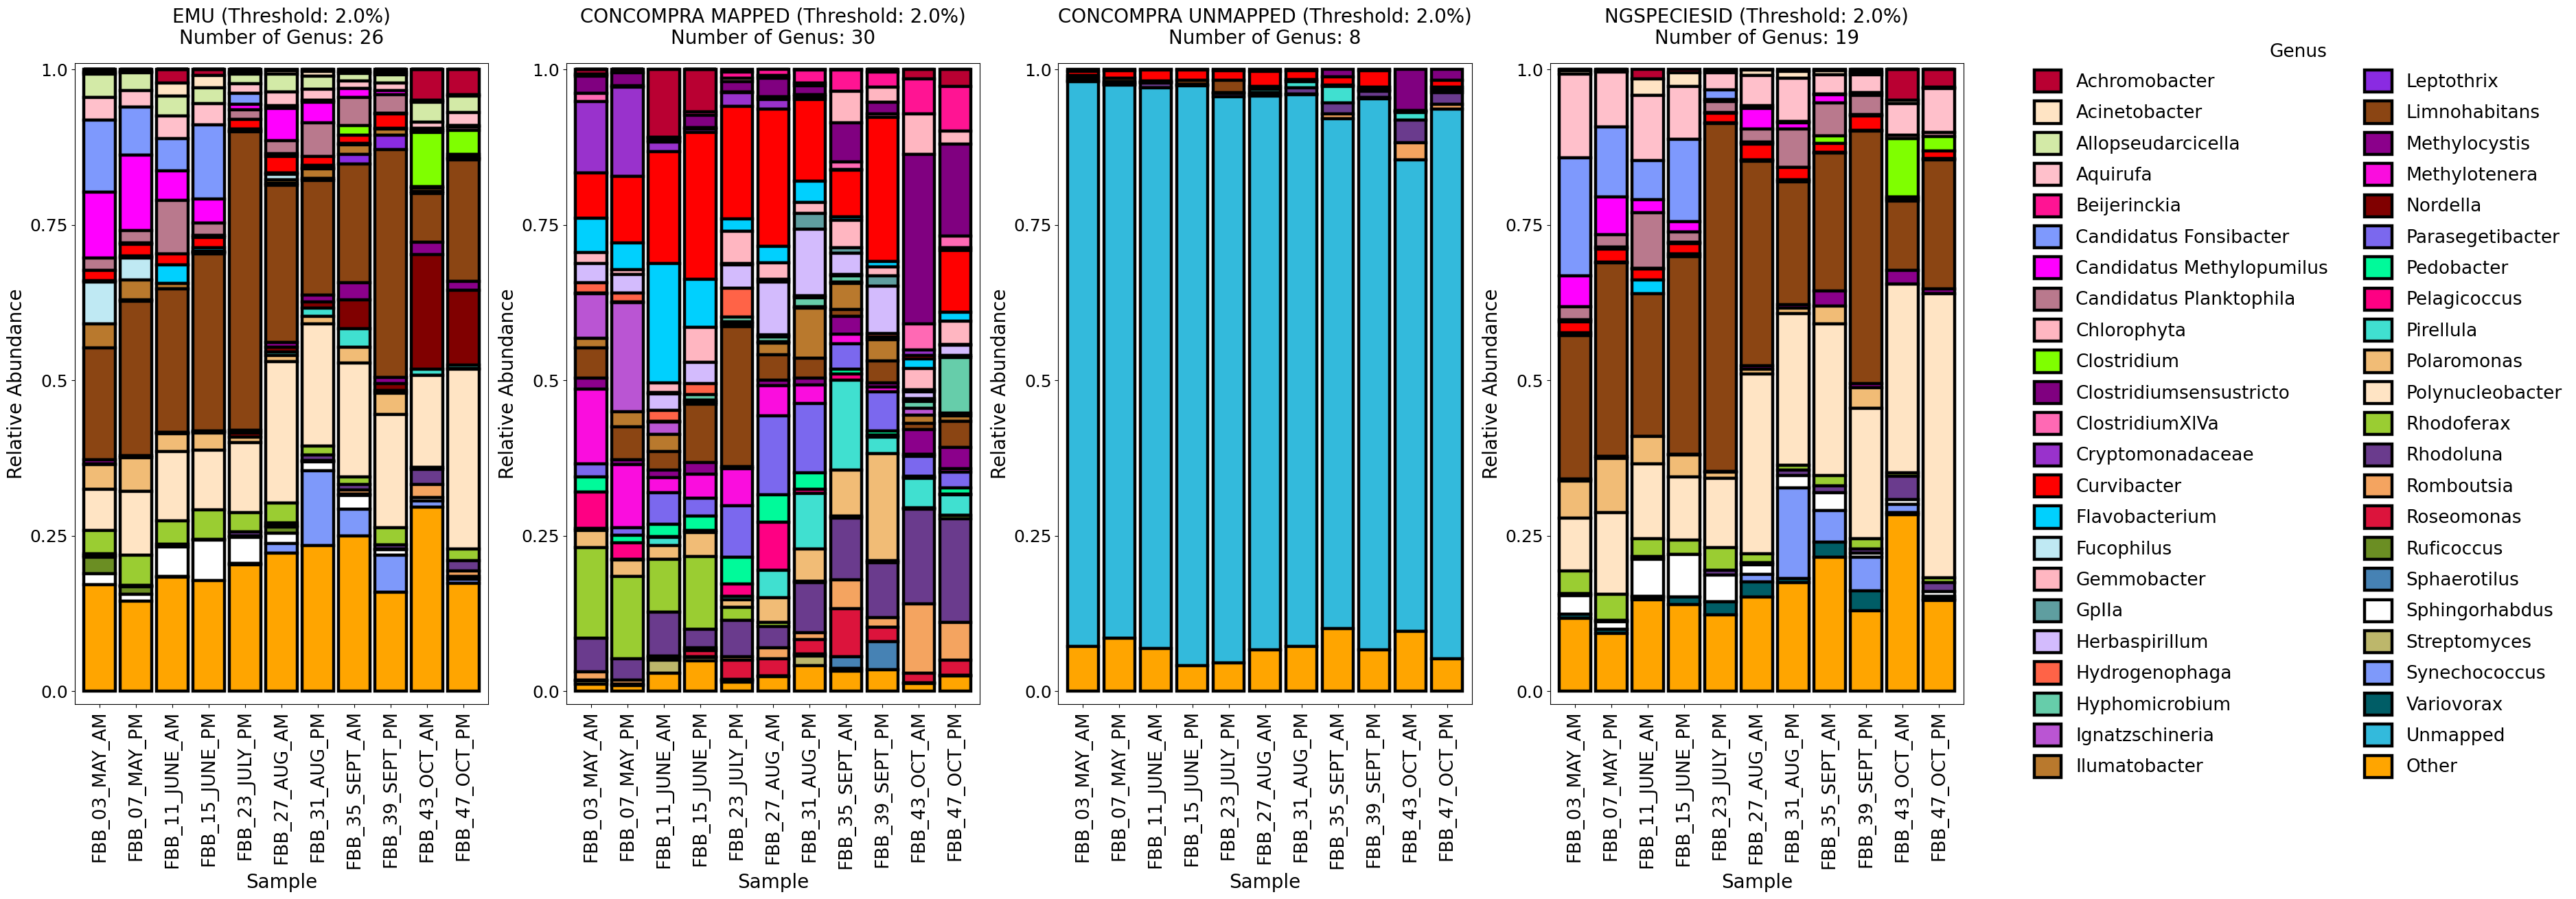

Species-Color Mapping: {'Unmapped': '#33BADC', 'Anaeromyxobacter': '#0000FF', 'Aquirufa': '#FFC0CB', 'Candidatus Methylopumilus': '#FF00FF', 'Clostridium': '#7FFF00', 'Curvibacter': '#FF0000', 'Dechloromonas': '#FAFAD2', 'Geobacter': '#556B2F', 'Legionella': '#D2691E', 'Limnohabitans': '#8B4513', 'Methylocystis': '#8B008B', 'Nordella': '#800000', 'Pelobacter': '#2F4F4F', 'Polynucleobacter': '#FFE4C4', 'Ramlibacter': '#FFD700', 'Rhodoferax': '#9ACD32', 'Other': '#FFA500', 'Agrococcus': '#87CEFA', 'Aquincola': '#DEB887', 'Brevundimonas': '#2EFCD8', 'ClostridiumIII': '#808080', 'Clostridiumsensustricto': '#800080', 'ClostridiumXlVa': '#FF69B4', 'Ferribacterium': '#9370DB', 'Ferruginibacter': '#DDA0DD', 'Flavobacterium': '#00D0FE', 'Janthinobacterium': '#0000FF', 'Methylobacillus': '#FDCED2', 'Methylotenera': '#FA0DDE', 'Microgenomates': '#22FF1C', 'Mucilaginibacter': '#FF0000', 'Pantoea': '#F1E78C', 'Rhizobium': '#0D6A0D', 'Rhodocyclus': '#F2870D', 'Rhodoluna': '#6A3B8D', 'Solitalea': '#B

In [ ]:
# ONLY RUN IT IF FIRST ITERATION IS RAN, THE CODE IS DIFFERENT

import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import OrderedDict

# Directories containing the TSV files
directories = {
    'EMU': './FBB/emu',
    'CONCOMPRA MAPPED': './FBB/concompra',
    'CONCOMPRA UNMAPPED': './FBB/concompra_unmapped',
    'NGSPECIESID': './FBB/ngspeciesid'
}

# Prepare the figure and axes
num_datasets = len(directories)
fig, axes = plt.subplots(1, num_datasets, figsize=(8 * num_datasets, 22))
axes = axes.flatten()

# Define the custom color palette
colors_list = [
    "#ADD8E6", "#0000FF", "#FFC0CB", "#FF00FF", "#7FFF00", "#FF0000", "#FAFAD2", "#556B2F", "#D2691E",
    "#8B4513", "#8B008B", "#800000", "#2F4F4F", "#FFE4C4", "#FFD700", "#9ACD32", "#6495ED",
    "#87CEFA", "#DEB887", "#2EFCD8", "#808080", "#800080", "#FF69B4", "#9370DB", "#DDA0DD",
    "#00D0FE", "#0000FF", "#FDCED2", "#FA0DDE", "#22FF1C", "#FF0000", "#F1E78C", "#0D6A0D", "#F2870D",
    "#6A3B8D", "#B40058", "#2EFCD8", "#6A4204", "#005D66", "#FFE4C4", "#D3EAA7", "#7E99FD",
    "#BFE9F3", "#F1BC76", "#FFFFFF", "#8B008B", "#FF9495", "#85CB0D", "#D3BBFD", "#B9792D",
    "#FE0083", "#B02ABB", "#868A71", "#FFFF00", "#808080", "#B90032", "#B90295", "#00008B", "#FE97E9",
    "#B9798D", "#8B7D6B", "#F1BC87", "#7E99FA", "#B40051", "#ADD8E6", "#FA0DDA", "#FFFFE0",
    "#A9A9A9", "#FF00FF", "#A52A2A", "#90EE90", "#FFB6C1", "#FFB6C1", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", 
    "#FF8C00", "#BDB76B", "#2E8B57", "#FF4500", "#CD5C5C",
    "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23", "#FF1493",
    "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A",
    "#4682B4", "#9ACD32", "#E9967A", "#483D8B", "#20B2AA", "#5F9EA0", "#DA70D6", "#FFDAB9", "#7B68EE", "#DC143C", "#FF8C00", "#BDB76B",
    "#2E8B57", "#FF4500", "#CD5C5C", "#8A2BE2", "#40E0D0", "#F4A460", "#6B8E23",
    "#FF1493", "#9932CC", "#FF6347", "#66CDAA", "#BA55D3", "#00FA9A", "#4682B4",
    "#E9967A", "#20B2AA", "#B22222", "#48D1CC", "#F08080", "#FF7F50", "#E0FFFF",
    "#B0C4DE", "#BC8F8F", "#DAA520", "#98FB98", "#ADFF2F", "#556B2F", "#8B0000",
    "#708090", "#D2B48C", "#CD853F", "#FFDEAD", "#A0522D", "#FF69B4", "#FFEFD5",
    "#DB7093", "#AFEEEE", "#FFFAF0", "#FFEB3B", "#C71585", "#9ACD32", "#F5DEB3"
]


# Threshold for significant species
threshold = 0.02

# For collecting legend entries
handles_list = []
labels_list = []

# Process each dataset
for idx, (key, directory) in enumerate(directories.items()):
    # Prepare an empty DataFrame for combining data
    combined_df = pd.DataFrame()

    # Process each file in the directory
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.tsv'):
            filepath = os.path.join(directory, filename)
            # Load the data from TSV file
            df = pd.read_csv(filepath, sep='\t', usecols=['genus', 'abundance'])
            # Aggregate the abundances by genus
            df_aggregated = df.groupby('genus').abundance.sum().reset_index()
            # Transpose and set genus as columns, total abundances as the only row
            df_aggregated = df_aggregated.set_index('genus').T
            # Rename the index to use the filename as the sample identifier
            df_aggregated.index = [filename.replace('.tsv', '')]
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df_aggregated], axis=0)

    # Fill NaN with zeros if any genus does not appear in some files
    combined_df.fillna(0, inplace=True)

    # Normalize the data to sum to 1 for each sample
    combined_df = combined_df.div(combined_df.sum(axis=1), axis=0)

    # Apply threshold and calculate "Other" category
    significant_species = combined_df.columns[combined_df.max(axis=0) > threshold]
    df_thresholded = combined_df[significant_species]
    df_thresholded['Other'] = 1 - df_thresholded.sum(axis=1)
    df_thresholded['Other'] = df_thresholded['Other'].clip(lower=0)

    # Sort the species columns alphabetically, with "Other" at the end
    base_species = [col for col in df_thresholded.columns if col not in ['Other', 'Unmapped']]
    sorted_species = sorted(base_species, key=str.lower)
    sorted_columns = sorted_species.copy()

    if 'Unmapped' in df_thresholded.columns:
        sorted_columns.append('Unmapped')
    if 'Other' in df_thresholded.columns:
        sorted_columns.append('Other')

    df_thresholded = df_thresholded[sorted_columns]

    # Assign colors to each species, saving the mapping to the species_color_map dictionary
    plot_colors = []

    # Ensure special colors always exist
    if 'Unmapped' in df_thresholded.columns:
        species_color_map.setdefault('Unmapped', "#33BADC")
    if 'Other' in df_thresholded.columns:
        species_color_map.setdefault('Other', "#FFA500")

    for species in df_thresholded.columns:
        if species in species_color_map:
            plot_colors.append(species_color_map[species])
        else:
            if len(species_color_map) < len(colors_list):
                color = colors_list[len(species_color_map) % len(colors_list)]
            else:
                color = "#000000"
            species_color_map[species] = color
            plot_colors.append(color)

    # Plot stacked bar chart with normalized data
    ax = df_thresholded.plot(
        kind='bar',
        stacked=True,
        width=0.86,
        ax=axes[idx],
        color=plot_colors,
        edgecolor='black',
        linewidth=3.2,
        legend=False
    )
    axes[idx].set_xlabel('Sample', fontsize=20)
    axes[idx].set_ylabel('Relative Abundance', fontsize=20)
    axes[idx].set_title(f'{key} (Threshold: {threshold*100}%)\nNumber of Genus: {len(df_thresholded.columns)}', fontsize=20, pad=20)
    axes[idx].tick_params(axis='x', labelsize=19)
    axes[idx].tick_params(axis='y', labelsize=18)

    axes[idx].set_ylim(-0.01, 1.02)
    axes[idx].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axes[idx].set_yticklabels(['1.0', '0.75', '0.5', '0.25', '0.0'])
    axes[idx].invert_yaxis()

    handles, labels = axes[idx].get_legend_handles_labels()
    handles_list.extend(handles)
    labels_list.extend(labels)

# Remove duplicate legend entries
by_label = OrderedDict(zip(labels_list, handles_list))

unmapped_label = 'Unmapped'
unmapped_handle = by_label.pop(unmapped_label, None)

other_label = 'Other'
other_handle = by_label.pop(other_label, None)

sorted_labels = sorted(by_label.keys(), key=str.lower)

if unmapped_handle:
    sorted_labels.append(unmapped_label)
    by_label[unmapped_label] = unmapped_handle

if other_handle:
    sorted_labels.append(other_label)
    by_label[other_label] = other_handle

sorted_handles = [by_label[label] for label in sorted_labels]

fig.legend(
    sorted_handles,
    sorted_labels,
    title='Genus',
    loc='upper left',
    bbox_to_anchor=(1.02, 0.98),
    ncol=2,
    fontsize='19',
    title_fontsize='19',
    edgecolor='black',
    fancybox=True,
    handleheight=1.5,
    handlelength=1.5,
    frameon=False
)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0.1, 0.4, 1, 1])
plt.savefig("FBB-GENUS.svg", format='svg', bbox_inches='tight')

plt.show()

print("Species-Color Mapping:", species_color_map)
